## Random agent (an agent that takes random actions) in the environment

In [64]:
import gym

env = gym.make('MountainCar-v0')
episode = 0
reward_per_episode_list = []

num_of_episodes = 100

for episode in range(num_of_episodes):
    
    state = env.reset()
    
    action = env.action_space.sample()
    
    reward_per_episode = 0
    
    
    while state[0] < 0.6:
        
        next_state, reward, done, _ = env.step(action)
        reward_per_episode = reward_per_episode + reward
        
        #print(next_state[0])
        
        
        if next_state[0] >=0.6:
            
            reward_per_episode_list.append(reward_per_episode)
            
            #print("Episode: {} Reward: {} ".format(episode, reward_per_episode))
            #state = env.reset()
            episode = episode + 1
            break
            
        else:
            state = next_state
            next_action = env.action_space.sample()
            action = next_action
            
print("The mean rewards for {} episodes is {}".format(num_of_episodes, sum(reward_per_episode_list)/num_of_episodes))

The mean rewards for 100 episodes is -51858.77


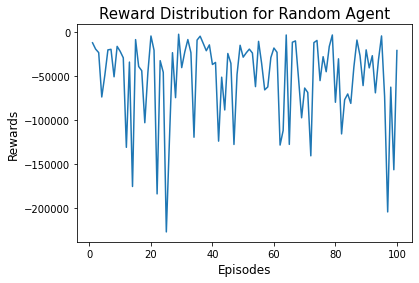

In [66]:
import matplotlib.pyplot as plt
from textwrap import wrap

y = reward_per_episode_list
x = [i for i in range(1,101)]

title = 'Reward Distribution for Random Agent'
plt.title('\n'.join(wrap(title,40)), fontsize=15)
plt.xlabel('Episodes', fontsize=12)
plt.ylabel('Rewards', fontsize=12)
plt.plot(x, y)
plt.show()

## State Distribution-aware Sampling for Deep Q- learning

In [3]:
env.reset()

array([-0.49299603,  0.        ])

In [4]:
import random
import numpy as np
from collections import deque
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
import time
import matplotlib.pyplot as plt
from keras.models import load_model
from simhash import Simhash

In [5]:
state_shape = env.observation_space.shape[0]
action_shape = env.action_space.n
replay_memory = deque(maxlen=20000)

# discount rate
gamma = 0.99 

# exploration rate
epsilon = 0.6  
epsilon_min = 0.01
epsilon_decay = 0.009
learning_rate = 0.01
mse_loss_per_episode = []


In [6]:
def simhash_similarity(str1,str2):
    """
         :param str1: string 1
         :param str2: string 2
         :return: returns the similarity of two articles
    """
    aa_simhash = Simhash(str1)
    bb_simhash = Simhash(str2)

    # print simhash value binary
    #print(bin(aa_simhash.value))
    #print(bin(bb_simhash.value))

         # 
    distince = aa_simhash.distance(bb_simhash)
    #print(distince)

    a = float(aa_simhash.value)
    b = float(bb_simhash.value)

    if a > b:
        similar= b / a
    else:
        similar= a / b

    return similar

In [7]:
def create_model():
    # Neural Net for Deep-Q learning Model
    model = Sequential()
    model.add(Dense(64, input_dim=state_shape, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(action_shape))
    model.compile(loss="mean_squared_error", optimizer=Adam(lr=learning_rate), metrics=['mse'])
    return model

In [8]:

# target_model = Model to predict future rewards/ target values
# If this step is not used, model does not converge
model = create_model()
target_model = create_model()
        

In [10]:
def remember(state, action, reward, next_state, done):
    
    replay_memory.append((state, action, reward, next_state, done))                    
                

            

In [11]:
def hashing(replay_memory):
    
    if len(replay_memory) > 500:
        
        hash_table = deque(maxlen=10)
        #mini_batch = []
        
        # 10 clusters
        cluster_1 = deque(maxlen=20000)
        cluster_2 = deque(maxlen=20000)
        cluster_3 = deque(maxlen=20000)
        cluster_4 = deque(maxlen=20000)
        cluster_5 = deque(maxlen=20000)
        cluster_6 = deque(maxlen=20000)
        cluster_7 = deque(maxlen=20000)
        cluster_8 = deque(maxlen=20000)
        cluster_9 = deque(maxlen=20000)
        cluster_10 = deque(maxlen=20000)
        
        # assign the first 10 state as a center centroid for each cluster
        cluster_1.append(replay_memory[0])
        cluster_2.append(replay_memory[1])
        cluster_3.append(replay_memory[2])
        cluster_4.append(replay_memory[3])
        cluster_5.append(replay_memory[4])
        cluster_6.append(replay_memory[5])
        cluster_7.append(replay_memory[6])
        cluster_8.append(replay_memory[7])
        cluster_9.append(replay_memory[8])
        cluster_10.append(replay_memory[9])
        
        #print(cluster_1)
        
        # get the state as a string to be used for SimHash comparison for each cluster centroid
        
        # cluster 1
        transition_tuple_1 = replay_memory[0]
        state_transition_array_1 = np.array(transition_tuple_1[0])
        # need to reshape to be converted in string
        state_transition_array_1 = state_transition_array_1.reshape(2,)
        state_transition_array_str_1 = state_transition_array_1.astype(str)
        
        # cluster 2
        transition_tuple_2 = replay_memory[1]
        state_transition_array_2 = np.array(transition_tuple_2[0])
        #print(state_transition_array_2)
        # need to reshape to be converted in string
        state_transition_array_2 = state_transition_array_2.reshape(2,)
        state_transition_array_str_2 = state_transition_array_2.astype(str)
        
        # cluster 3
        transition_tuple_3 = replay_memory[2]
        state_transition_array_3 = np.array(transition_tuple_3[0])
        # need to reshape to be converted in string
        state_transition_array_3 = state_transition_array_3.reshape(2,)
        state_transition_array_str_3 = state_transition_array_3.astype(str)
        
        # cluster 4
        transition_tuple_4 = replay_memory[3]
        state_transition_array_4 = np.array(transition_tuple_4[0])
        # need to reshape to be converted in string
        state_transition_array_4 = state_transition_array_4.reshape(2,)
        state_transition_array_str_4 = state_transition_array_4.astype(str)
        
        # cluster 5
        transition_tuple_5 = replay_memory[4]
        state_transition_array_5 = np.array(transition_tuple_5[0])
        # need to reshape to be converted in string
        state_transition_array_5 = state_transition_array_5.reshape(2,)
        state_transition_array_str_5 = state_transition_array_5.astype(str)
      
        # cluster 6
        transition_tuple_6 = replay_memory[5]
        state_transition_array_6 = np.array(transition_tuple_6[0])
        # need to reshape to be converted in string
        state_transition_array_6 = state_transition_array_6.reshape(2,)
        state_transition_array_str_6 = state_transition_array_6.astype(str)
        
        # cluster 7
        transition_tuple_7 = replay_memory[6]
        state_transition_array_7 = np.array(transition_tuple_7[0])
        # need to reshape to be converted in string
        state_transition_array_7 = state_transition_array_7.reshape(2,)
        state_transition_array_str_7 = state_transition_array_7.astype(str)
        
        # cluster 8
        transition_tuple_8 = replay_memory[7]
        state_transition_array_8 = np.array(transition_tuple_8[0])
        # need to reshape to be converted in string
        state_transition_array_8 = state_transition_array_8.reshape(2,)
        state_transition_array_str_8 = state_transition_array_8.astype(str)
        
        # cluster 9
        transition_tuple_9 = replay_memory[8]
        state_transition_array_9 = np.array(transition_tuple_9[0])
        # need to reshape to be converted in string
        state_transition_array_9 = state_transition_array_9.reshape(2,)
        state_transition_array_str_9 = state_transition_array_9.astype(str)
        
          
        # cluster 10
        transition_tuple_10 = replay_memory[9]
        state_transition_array_10 = np.array(transition_tuple_10[0])
        # need to reshape to be converted in string
        state_transition_array_10 = state_transition_array_10.reshape(2,)
        state_transition_array_str_10 = state_transition_array_10.astype(str)
        
        # the first 10 (0-9) is set as the cluster centroid
        for i in range(10, len(replay_memory)):
            
            transition_tuple = replay_memory[i]
            
            state_transition_array = np.array(transition_tuple[0])
            # need to reshape to be converted in string
            state_transition_array = state_transition_array.reshape(2,)
            state_transition_array_str = state_transition_array.astype(str)
            
            sim_list = []
            
            similarity1 = simhash_similarity(state_transition_array_str_1,state_transition_array_str)
            sim_list.append(similarity1)
            
            similarity2 = simhash_similarity(state_transition_array_str_2,state_transition_array_str)
            sim_list.append(similarity2)
            
            similarity3 = simhash_similarity(state_transition_array_str_3,state_transition_array_str)
            sim_list.append(similarity3)
            
            similarity4 = simhash_similarity(state_transition_array_str_4,state_transition_array_str)
            sim_list.append(similarity4)
            
            similarity5 = simhash_similarity(state_transition_array_str_5,state_transition_array_str)
            sim_list.append(similarity5)
            
            similarity6 = simhash_similarity(state_transition_array_str_6,state_transition_array_str)
            sim_list.append(similarity6)
            
            similarity7 = simhash_similarity(state_transition_array_str_7,state_transition_array_str)
            sim_list.append(similarity7)
            
            similarity8 = simhash_similarity(state_transition_array_str_8,state_transition_array_str)
            sim_list.append(similarity8)
            
            similarity9 = simhash_similarity(state_transition_array_str_9,state_transition_array_str)
            sim_list.append(similarity9)
            
            similarity10 = simhash_similarity(state_transition_array_str_10,state_transition_array_str)
            sim_list.append(similarity10)
            
            
            # get the highest similarity value
            max_val = max(sim_list)
            
            # the index of the highest similarity will be the cluster number
            max_val_idx = sim_list.index(max_val)
            
            
            if max_val_idx == 0:
                cluster_1.append(transition_tuple)
            
            if max_val_idx == 1:
                cluster_2.append(transition_tuple)
                
            if max_val_idx == 2:
                cluster_3.append(transition_tuple)
            
            if max_val_idx == 3:
                cluster_4.append(transition_tuple)
            
            if max_val_idx == 4:
                cluster_5.append(transition_tuple)
                
            if max_val_idx == 5:
                cluster_6.append(transition_tuple)
            
            if max_val_idx == 6:
                cluster_7.append(transition_tuple)
            
            if max_val_idx == 7:
                cluster_8.append(transition_tuple)
            
            if max_val_idx == 8:
                cluster_9.append(transition_tuple)
                
            if max_val_idx == 9:
                cluster_10.append(transition_tuple)
            

            hash_table.append(cluster_1)
            hash_table.append(cluster_2)
            hash_table.append(cluster_3)
            hash_table.append(cluster_4)
            hash_table.append(cluster_5)
            hash_table.append(cluster_6)
            hash_table.append(cluster_7)
            hash_table.append(cluster_8)
            hash_table.append(cluster_9)
            hash_table.append(cluster_10)
            
        return hash_table

In [13]:
def train_model(hash_table):
    
    # exploration rate
    epsilon = 0.00  
    epsilon_min = 0.001
    epsilon_decay = 0.009
    
    # If memory does not have enough elements to create batch
    # if len(replay_memory) < batch_size:
    if len(replay_memory) < 500:
        return
    
    # need to change to sampling distribution from the hash table
    # use random.choice for each cluster
    # for each cluster, choose 10 to sample
    # choose batch_size number of elements from memory
    
    elif len(replay_memory) > 500:
    
        mini_batch = []
        
        BETA = 0.4
        
        output = random.choices(population=hash_table,
                                weights = [
                                           1 + (1-BETA) * 1/(10*len(hash_table[0])),
                                           1 + (1-BETA) * 1/(10*len(hash_table[1])),
                                           1 + (1-BETA) * 1/(10*len(hash_table[2])),
                                           1 + (1-BETA) * 1/(10*len(hash_table[3])),
                                           1 + (1-BETA) * 1/(10*len(hash_table[4])),
                                           1 + (1-BETA) * 1/(10*len(hash_table[5])),
                                           1 + (1-BETA) * 1/(10*len(hash_table[6])),
                                           1 + (1-BETA) * 1/(10*len(hash_table[7])),
                                           1 + (1-BETA) * 1/(10*len(hash_table[8])),
                                           1 + (1-BETA) * 1/(10*len(hash_table[9]))
                                           ],
                                k = 10
                               )
        for i in range(len(output)):
            
            if len(output[i]) < 11:
                for transition in output[i]:
                    mini_batch.append(transition)
            elif not output[i]:
                continue
            
            else:
                batch_of_10 = random.sample(output[i], 10)
                
                for transition in batch_of_10:
                    mini_batch.append(transition)
                    


        #mini_batch = random.sample(replay_memory, batch_size)
        episode_loss = []

        for sample in mini_batch:
            state, action, reward, new_state, done = sample

            # current_q is the prediction of three action values of current_q
            current_q = model.predict(state)

            # if you reach end of the batch, there is no future reward, so
            # current reward is the final reward for that action
            # else, use the bellman equation
            if done:
                current_q[0][action] = reward
            else:
                max_future_q = max(target_model.predict(new_state)[0])

                current_q[0][action] = reward + max_future_q * gamma

            history = model.fit(state, current_q, epochs=1, verbose=0)

            episode_loss.append(history.history['loss'][0])

        avg_loss = np.array(episode_loss)

        mse_loss_per_episode.append(np.mean(avg_loss))

        print("Avg loss: ", np.mean(avg_loss))
    
    
    
    
    

In [14]:
# This function copies weights from current model to the target model but this is done less frequently
def train_target_model():
    weights = model.get_weights()
    
    target_weights = target_model.get_weights()
    
    for i in range(len(target_weights)):
        target_weights[i] = weights[i]
        
    target_model.set_weights(target_weights)

In [15]:
# Based on the epsilon value, make exploration/exploitation decision
def take_action(state, model):
    r = np.random.random()
    if r < max(epsilon, epsilon_min):
        # Go for the exploration
        return env.action_space.sample()
    
    # else, go for the exploitation
    return np.argmax(model.predict(state)[0])

In [17]:
print("State space (gym calls it observation space)")
print(env.observation_space)
print("\nAction space")
print(env.action_space)

State space (gym calls it observation space)
Box(-1.2000000476837158, 0.6000000238418579, (2,), float32)

Action space
Discrete(3)


In [18]:
env.reset()

array([-0.54743469,  0.        ])

In [19]:
# Parameters
NUM_STEPS = 200
NUM_EPISODES = 10
LEN_EPISODE = 100
reward_history = []
running_averages = []
below_175 = []
below_150 = []
below_100 = []




In [20]:
%%time
# create DQNAgent
#agent = DQNAgent(env)

# count the episodes to update the target model and epsilon
target_model_update_count = 0

# Run for NUM_EPISODES
for episode in range(NUM_EPISODES):
    
    episode_reward = 0
    
    curr_state = env.reset().reshape(1,2)
    
    #print(curr_state)
    
    step = 0
        
    
    while curr_state[0][0] < 0.6:
        
        step = step + 1
        
        #print(step)
        
        #print(curr_state[0][0])
        
        # Based on epsilon-greedy strategy take the action
        action = take_action(curr_state, model=model)
        
        # Step forward and receive next state and reward
        
        next_state, reward, done, _ = env.step(action)
        
        next_state = next_state.reshape(1,2)
        
        # Record history
        episode_reward += reward
        
        
        
        
        # This is where your NN/GP code should go
        # Create target vector
        # Train the network/GP
        # Update the policy
        
        # done flag is set when the episode ends: either goal is reached or 1000 steps are done
        if next_state[0][0] >= 0.6 or step == 510:
            
            reward_history.append(episode_reward)
            print()
            print("---------------------------Target Reached---------------------------------------")
            print("Episode reward: ", episode_reward, "Episode Count: ", episode, "Epsilon: ", epsilon)
            
            
            
            break
        
        
        remember(curr_state, action, reward, next_state, done)
        hash_table = hashing(replay_memory)
        #print(len(hash_table))
        #print(step)
        #print(len(replay_memory))
        #print()
        
        
        # Current state for next step
        curr_state = next_state
        
        
    
    target_model_update_count = target_model_update_count + 1
    #print(target_model_update_count)
    
    
    
    # Train the model with batch size equal to 64
    train_model(hash_table)

    # Update the target model every 2 episodes
    if target_model_update_count % 2 == 0:
        train_target_model()

    # Update the epsilon every 2 episodes
    if target_model_update_count % 2 == 0:
        if(epsilon > epsilon_min):
            epsilon = epsilon - (epsilon * epsilon_decay)
        target_model_update_count = 0
    
    
#print("Below 175: ", below_175)
#print("Below 150: ", below_150)
#print("Below 100: ", below_100)

print(np.mean(reward_history))


---------------------------Target Reached---------------------------------------
Episode reward:  -510.0 Episode Count:  0 Epsilon:  0.6
Avg loss:  0.03243048303157764

---------------------------Target Reached---------------------------------------
Episode reward:  -510.0 Episode Count:  1 Epsilon:  0.6
Avg loss:  0.002931747214010443

---------------------------Target Reached---------------------------------------
Episode reward:  -510.0 Episode Count:  2 Epsilon:  0.5946
Avg loss:  0.0953401454666187

---------------------------Target Reached---------------------------------------
Episode reward:  -510.0 Episode Count:  3 Epsilon:  0.5946
Avg loss:  0.0890708568409923

---------------------------Target Reached---------------------------------------
Episode reward:  -510.0 Episode Count:  4 Epsilon:  0.5892486
Avg loss:  0.15643798931501807

---------------------------Target Reached---------------------------------------
Episode reward:  -510.0 Episode Count:  5 Epsilon:  0.5892486


In [62]:
env.reset()

array([-0.52463701,  0.        ])

In [67]:
reward_per_episode_list=[]

In [ ]:
# Run for NUM_EPISODES
num_of_episodes = 100

for episode in range(num_of_episodes):
    
    episode_reward = 0
    
    curr_state = env.reset().reshape(1,2)
    
    #print(curr_state)
    
    step = 0
 
    
    while curr_state[0][0] < 0.6:
        
        step = step + 1
        
        print(step)
        
        #print(curr_state[0][0])
        
        # Based on epsilon-greedy strategy take the action
        #action = take_action(curr_state, model=model)
        action = np.argmax(model.predict(curr_state)[0])
        
        # Step forward and receive next state and reward
        
        next_state, reward, done, _ = env.step(action)
        
        next_state = next_state.reshape(1,2)
        
        # Record history
        episode_reward += reward
        
        # done flag is set when the episode ends: either goal is reached or 1000 steps are done
        if next_state[0][0] >= 0.6:
            
            reward_per_episode_list.append(episode_reward)
            print()
            print("---------------------------Target Reached---------------------------------------")
            print("Episode reward: ", episode_reward, "Episode Count: ", episode)
            
            break
        
        # Current state for next step
        curr_state = next_state



In [69]:
print("The mean rewards for {} episodes is {}".format(num_of_episodes, sum(reward_per_episode_list)/num_of_episodes))

The mean rewards for 100 episodes is 21683.33


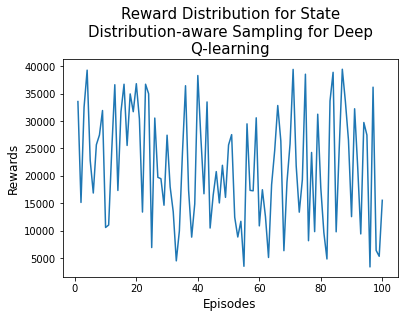

In [71]:
y = reward_per_episode_list
x = [i for i in range(1,101)]

title = 'Reward Distribution for State Distribution-aware Sampling for Deep Q-learning'
plt.title('\n'.join(wrap(title,40)), fontsize=15)
plt.xlabel('Episodes', fontsize=12)
plt.ylabel('Rewards', fontsize=12)
plt.plot(x, y)
plt.show()